# Python for Data Analysis - Workbook 4 (Plotting & Visualization)

### Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[0 1 2 3 4 5 6 7 8 9]


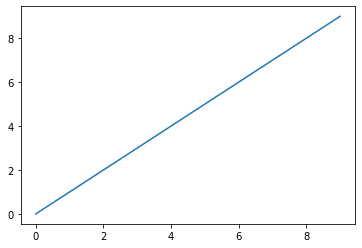

In [5]:
data = np.arange(10)
print(data)

# Easy line plot
plt.plot(data)

In [ ]:
# https://matplotlib.org/3.2.2/api/pyplot_summary.html

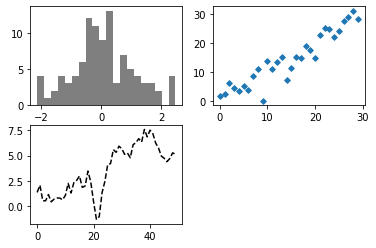

In [35]:
np.random.seed(10)

# Plots in matplotlib reside within a Figure object
# Create a new figure object with plt.figure()

fig = plt.figure()

# Now add a subplot

ax1 = fig.add_subplot(2, 2, 1) # first two args are figure size (2x2), and third arg is the quadrant we're selecting
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Plotting commands always start on the last figure and subplot by default
plt.plot(np.random.randn(50).cumsum(), color = 'k', linestyle = '--')

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30), s = 16, marker = 'D') # s for dot size


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a279670b8>,
      dtype=object)

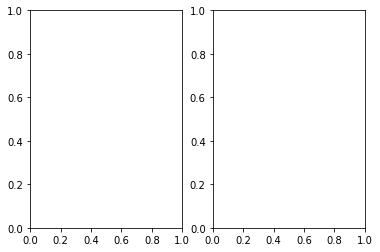

In [39]:
# Creating a figure with a grid of subplots is very common, so matplotlib includes a convenience method
# plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects

fig, axes = plt.subplots(1, 2)
axes # Notice this is an array and can be acessed as such

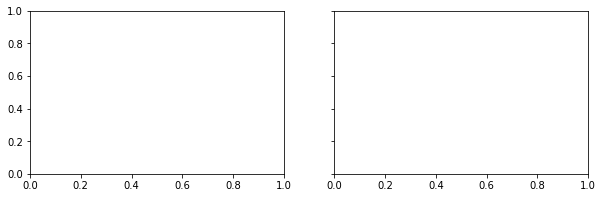

In [51]:
# Can also share axes

fig, axes = plt.subplots(1, 2, figsize = (10,3), sharey = True)

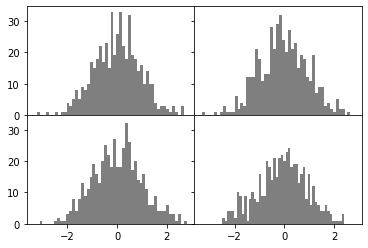

In [53]:
# Can also control the padding between and around the subplots, as in this example to shrink gap between to 0

fig, axes = plt.subplots(2,2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)

plt.subplots_adjust(wspace = 0, hspace = 0)